## Baseline modeling

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import cv2 as cv

from matplotlib import pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten
from tensorflow.keras.activations import relu, sigmoid
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.utils import plot_model

In [2]:
tree_types = os.listdir('../data/image data/train')
X = []
y = []

for tree in tree_types:
    tree_path = os.path.join('../data/image data/train', tree)
    tree_disease_types = os.listdir(tree_path)

    for disease in tree_disease_types:
        img_name = os.listdir(os.path.join(tree_path, disease))

        for img in img_name:
            image_path = os.path.join(tree_path, disease, img)
            image = cv.resize(cv.imread(image_path), dsize=(128, 128))
            X.append(image)
            y.append([tree, disease])

In [3]:
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(y)
y

array([[1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [4]:
X

[array([[[197, 164, 168],
         [195, 162, 166],
         [195, 162, 166],
         ...,
         [215, 186, 189],
         [213, 184, 187],
         [209, 180, 183]],
 
        [[198, 165, 169],
         [196, 163, 167],
         [195, 162, 166],
         ...,
         [214, 185, 188],
         [215, 186, 189],
         [212, 183, 186]],
 
        [[198, 165, 169],
         [199, 166, 170],
         [199, 166, 170],
         ...,
         [213, 184, 187],
         [213, 184, 187],
         [213, 184, 187]],
 
        ...,
 
        [[130,  96, 106],
         [126,  92, 102],
         [125,  91, 101],
         ...,
         [135, 108, 124],
         [136, 109, 125],
         [136, 109, 125]],
 
        [[126,  92, 102],
         [128,  94, 104],
         [126,  92, 102],
         ...,
         [138, 111, 127],
         [139, 112, 128],
         [138, 111, 127]],
 
        [[127,  93, 103],
         [127,  93, 103],
         [126,  92, 102],
         ...,
         [130, 103, 119],
  

In [5]:
val_x = []
val_y = []

for tree in tree_types:
    tree_path = os.path.join('../data/image data/validation', tree)
    tree_disease_types = os.listdir(tree_path)

    for disease in tree_disease_types:
        img_name = os.listdir(os.path.join(tree_path, disease))

        for img in img_name:
            image_path = os.path.join(tree_path, disease, img)
            image = cv.resize(cv.imread(image_path), dsize=(128, 128))
            val_x.append(image)
            val_y.append([tree, disease])

In [6]:
val_y = mlb.transform(val_y)
val_y

array([[1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [7]:
baseline_1 = Sequential()

baseline_1.add(InputLayer(input_shape=(128,128,3)))
baseline_1.add(Flatten())
baseline_1.add(Dense(units=512,activation=relu))
baseline_1.add(Dense(units=512,activation=relu))
baseline_1.add(Dense(units=512,activation=relu))
baseline_1.add(Dense(units=42,activation=sigmoid))

baseline_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 49152)             0         
                                                                 
 dense (Dense)               (None, 512)               25166336  
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 42)                21546     
                                                                 
Total params: 25,713,194
Trainable params: 25,713,194
Non-trainable params: 0
_________________________________________________________________


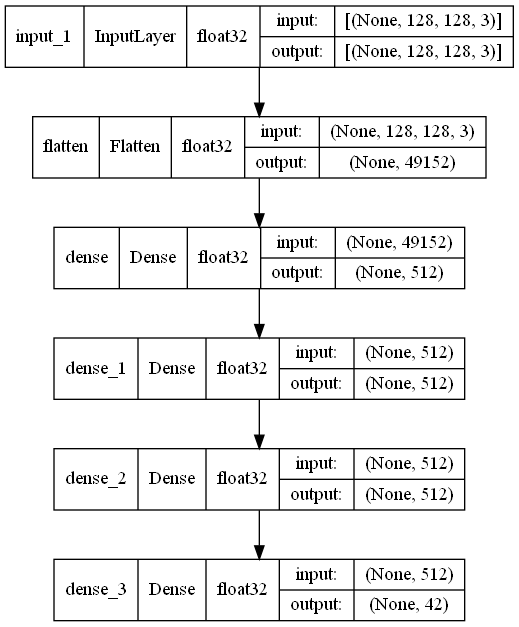

In [8]:
plot_model(baseline_1,
           to_file='../models/baseline_1.png',
           show_shapes=True,
           show_dtype=True,
           show_layer_names=True)